In [8]:
import pandas as pd
unrate = pd.read_csv('/home/kamlesh/AnacondaProjects/Dataquest/Data/unrate.csv')
unrate['DATE'] = pd.to_datetime(unrate['DATE'])
print(unrate.head(12))

         DATE  VALUE
0  1948-01-01    3.4
1  1948-02-01    3.8
2  1948-03-01    4.0
3  1948-04-01    3.9
4  1948-05-01    3.5
5  1948-06-01    3.6
6  1948-07-01    3.6
7  1948-08-01    3.9
8  1948-09-01    3.8
9  1948-10-01    3.7
10 1948-11-01    3.8
11 1948-12-01    4.0


Before we get into visual representations of data, let's first read this CSV file into pandas to explore the table representation of this data. The dataset we'll be working with is a time series dataset, which means the data points (monthly unemployment rates) are ordered by time. Here's a preview of the dataset

In [9]:
unrate.dtypes

DATE     datetime64[ns]
VALUE           float64
dtype: object

For example, one thing we learned from looking at the monthly unemployment rates for 1948 is that every few months, the unemployment rate switches between trending up and trending down. It's not switching direction every month, however, and this could mean that there's a seasonal effect. Seasonality is when a pattern is observed on a regular, predictable basis for a specific reason. A simple example of seasonality would be a large increase textbook purchases every August every year. Many schools start their terms in August and this spike in textbook sales is directly linked.

We need to first understand if there's any seasonality by comparing the unemployment trends across many years so we can decide if we should investigate it further. The faster we're able to assess our data, the faster we can perform high-level analysis quickly. If we're reliant on just the table to help us figure this out, then we won't be able to perform a high level test quickly. Let's see how a visual representation of the same information can be more helpful than the table representation.

#### Lets visulaize data with the help of plots and charts


    create a plot using data
    customize the appearance of the plot
    display the plot
    edit and repeat until satisfied


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

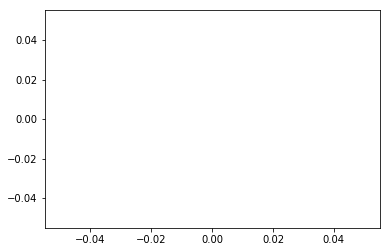

In [12]:
plt.plot()
plt.show()

Because we didn't pass in any arguments, the plot() function would generate an empty plot with just the axes and ticks and the show() function would display that plot. You'll notice that we didn't assign the plot to a variable and then call a method on the variable to display it. We instead called 2 functions on the pyplot module directly.

This is because every time we call a pyplot function, the module maintains and updates the plot internally (also known as state). When we call show(), the plot is displayed and the internal state is destroyed. While this workflow isn't ideal when we're writing functions that create plots on a repeated basis as part of a larger application, it's useful when exploring data.

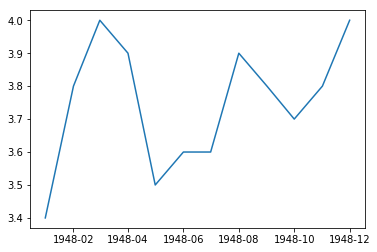

In [16]:
# Assigned first 12 rows to a variable just for easy reference.
first_twelve = unrate[0:12]
x = first_twelve['DATE']
plt.plot(x, first_twelve['VALUE'])
#plt.xticks(rotation=90)
plt.show()

Matplotlib will accept any iterable object, like NumPy arrays and pandas.Series instances.

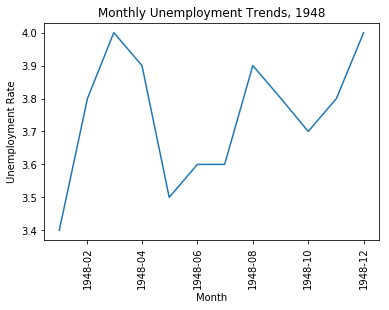

In [14]:
plt.plot(first_twelve['DATE'], first_twelve['VALUE'])
plt.xticks(rotation=90)
plt.xlabel('Month')
plt.ylabel('Unemployment Rate')
plt.title('Monthly Unemployment Trends, 1948')
plt.show()

### 2 Multiple Plots

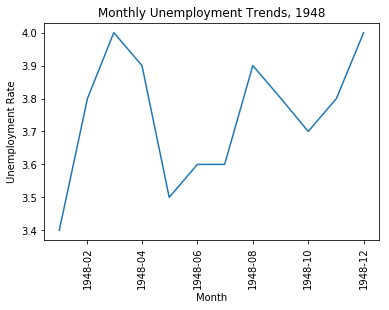

In [13]:
unrate['DATE'] = pd.to_datetime(unrate['DATE'],yearfirst=True,dayfirst= False)
first_twelve = unrate[0:12]
plt.plot(first_twelve['DATE'], first_twelve['VALUE'])
plt.xticks(rotation=90)
plt.xlabel('Month')
plt.ylabel('Unemployment Rate')
plt.title('Monthly Unemployment Trends, 1948')
plt.show()

When we were working with a single plot, pyplot was storing and updating the state of that single plot. We could tweak the plot just using the functions in the pyplot module. When we want to work with multiple plots, however, we need to be more explicit about which plot we're making changes to. This means we need to understand the matplotlib classes that pyplot uses internally to maintain state so we can interact with them directly. Let's first start by understanding what pyplot was automatically storing under the hood when we create a single plot:

    a container for all plots was created (returned as a Figure object)
    a container for the plot was positioned on a grid (the plot returned as an Axes object)
    visual symbols were added to the plot (using the Axes methods)

A figure acts as a container for all of our plots and has methods for customizing the appearance and behavior for the plots within that container. Some examples include changing the overall width and height of the plotting area and the spacing between plots.

We can manually create a figure by calling pyplot.figure():

fig = plt.figure()

Instead of only calling the pyplot function, we assigned its return value to a variable (fig). After a figure is created, an axes for a single plot containing no data is created within the context of the figure. When rendered without data, the plot will resemble the empty plot from the previous mission. The Axes object acts as its own container for the various components of the plot, such as:

    values on the x-axis and y-axis
    ticks on the x-axis and y-axis
    all visual symbols, such as:
        markers
        lines
        gridlines

While plots are represented using instances of the Axes class, they're also often referred to as subplots in matplotlib. To add a new subplot to an existing figure, use Figure.add_subplot. This will return a new Axes object, which needs to be assigned to a variable:

axes_obj = fig.add_subplot(nrows, ncols, plot_number)

If we want the figure to contain 2 plots, one above the other, we need to write:

ax1 = fig.add_subplot(2,1,1)

ax2 = fig.add_subplot(2,1,2)

This will create a grid, 2 rows by 1 column, of plots. Once we're done adding subplots to the figure, we display everything using plt.show():

import matplotlib.pyplot as plt

fig = plt.figure()

ax1 = fig.add_subplot(2,1,1)

ax2 = fig.add_subplot(2,1,2)

plt.show()

Let's create a figure, add subplots to it, and display it.


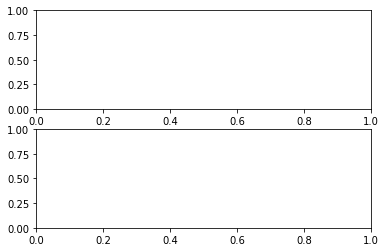

In [18]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
plt.show()

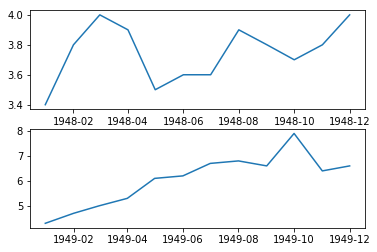

In [17]:

fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.plot(unrate.iloc[0:12]['DATE'], unrate[0:12]['VALUE'])
ax2.plot(unrate[12:24]['DATE'], unrate[12:24]['VALUE'])
#ax2.plot(unrate.loc[12:24]['DATE'], unrate.[12:24]['VALUE'])
# In the above line it gives error of size miss match - analyse it latter # ask on stackover flow or anywhere
plt.show()

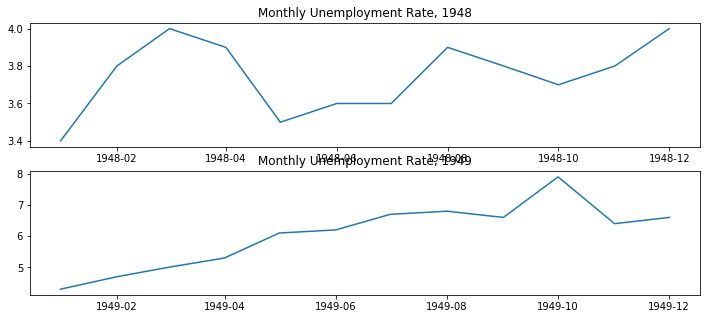

In [21]:
#size is in inches ,dpi is also there explore it for!!!
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
ax1.plot(unrate[0:12]['DATE'], unrate[0:12]['VALUE'])
ax1.set_title('Monthly Unemployment Rate, 1948')
ax2.plot(unrate[12:24]['DATE'], unrate[12:24]['VALUE'])
ax2.set_title('Monthly Unemployment Rate, 1949')
plt.show()

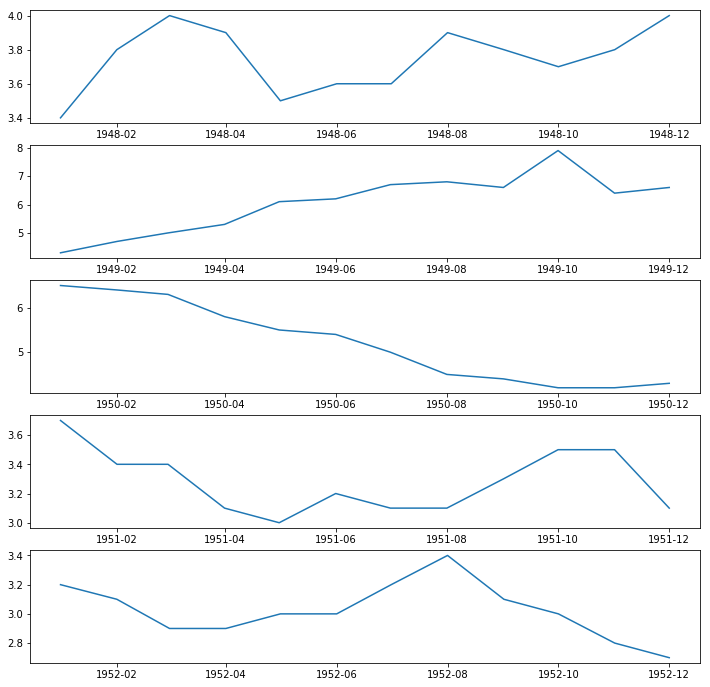

In [22]:
fig = plt.figure(figsize=(12,12))

for i in range(5):
    ax = fig.add_subplot(5,1,i+1)
    start_index = i*12
    end_index = (i+1)*12
    subset = unrate[start_index:end_index]
    ax.plot(subset['DATE'], subset['VALUE'])

plt.show()

By adding more line charts, we can look across more years for seasonal trends. This comes at a cost, unfortunately. We now have to visually scan over more space, which is a limitation that we experienced when scanning the table representation of the same data. If you recall, one of the limitations of the table representation we discussed in the previous mission was the amount of time we'd have to spend scanning the table as the number of rows increased significantly.

We can handle the visual overhead each additional plot adds by overlaying the line charts in a single subplot. If we remove the year from the x-axis and just keep the month values, we can use the same x-axis values to plot all of the lines. First, we'll explore how to extract just the month values from the DATE column, then we'll dive into generating multiple plots on the same coordinate grid.

To extract the month values from the DATE column and assign them to a new column, we can use the pandas.Series.dt accessor:

unrate['MONTH'] = unrate['DATE'].dt.month

Calling pandas.Series.dt.month returns a Series containing the integer values for each month (e.g. 1 for January, 2 for February, etc.). Under the hood, pandas applies the datetime.date function over each datetime value in the DATE column, which returns the integer month value. Let's now move onto generating multiple line charts in the same subplot.

In the last mission, we called pyplot.plot() to generate a single line chart. Under the hood, matplotlib created a figure and a single subplot for this line chart. If we call pyplot.plot() multiple times, matplotlib will generate the line charts on the single subplot.


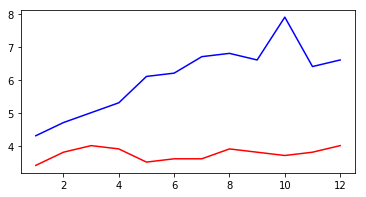

In [31]:
# value in new column month
unrate['MONTH'] = unrate['DATE'].dt.month # extracting month
fig = plt.figure(figsize=(6,3))

plt.plot(unrate[0:12]['MONTH'], unrate[0:12]['VALUE'], c='red')
plt.plot(unrate[12:24]['MONTH'], unrate[12:24]['VALUE'], c='blue')

plt.show()

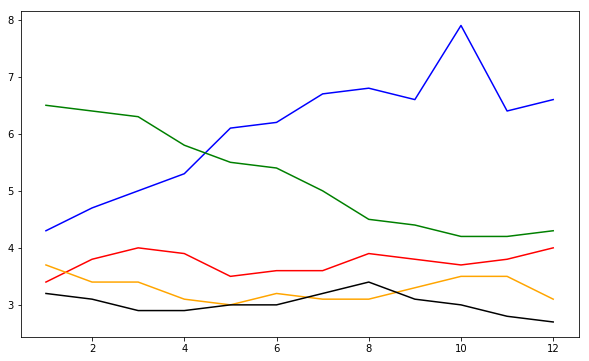

In [32]:
fig = plt.figure(figsize=(10,6))
colors = ['red', 'blue', 'green', 'orange', 'black']
for i in range(5):
    start_index = i*12
    end_index = (i+1)*12
    subset = unrate[start_index:end_index]
    plt.plot(subset['MONTH'], subset['VALUE'], c=colors[i])
    
plt.show()

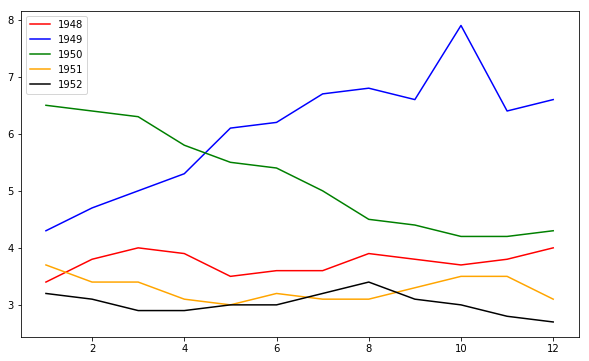

In [33]:
fig = plt.figure(figsize=(10,6))
colors = ['red', 'blue', 'green', 'orange', 'black']
for i in range(5):
    start_index = i*12
    end_index = (i+1)*12
    subset = unrate[start_index:end_index]
    label = str(1948 + i)
    plt.plot(subset['MONTH'], subset['VALUE'], c=colors[i], label=label) # for the legend
plt.legend(loc='upper left')

plt.show()

Text(0,0.5,'Unemployment Rate, Percent')

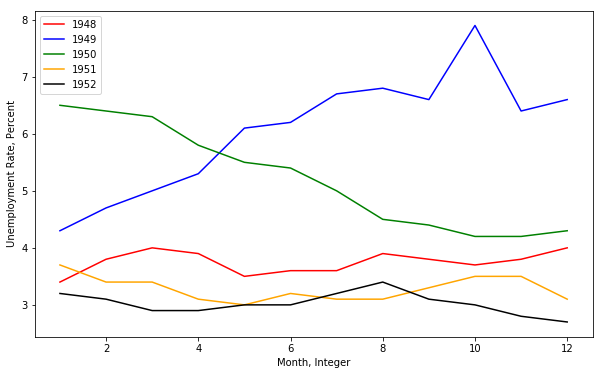

In [34]:
fig = plt.figure(figsize=(10,6))
colors = ['red', 'blue', 'green', 'orange', 'black']
for i in range(5):
    start_index = i*12
    end_index = (i+1)*12
    subset = unrate[start_index:end_index]
    label = str(1948 + i)
    plt.plot(subset['MONTH'], subset['VALUE'], c=colors[i], label=label)
plt.legend(loc='upper left')
plt.xlabel('Month, Integer')
plt.ylabel('Unemployment Rate, Percent')

### Bar plots and Scatter plots

https://github.com/fivethirtyeight/data/tree/master/fandango
#about the data

In [24]:
import pandas as pd
reviews = pd.read_csv('/home/kamlesh/AnacondaProjects/Dataquest/Data/fandango.csv')
cols = ['FILM', 'RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']
norm_reviews = reviews[cols] # data copy ?
#print(norm_reviews[)
norm_reviews.head()

,FILM,RT_user_norm,Metacritic_user_nom,IMDB_norm,Fandango_Ratingvalue,Fandango_Stars
0,Avengers: Age of Ultron (2015),4.3,3.55,3.90,4.5,5.0
1,Cinderella (2015),4.0,3.75,3.55,4.5,5.0
2,Ant-Man (2015),4.5,4.05,3.90,4.5,5.0
3,Do You Believe? (2015),4.2,2.35,2.70,4.5,5.0
4,Hot Tub Time Machine 2 (2015),1.4,1.70,2.55,3.0,3.5


These sites use different scales for ratings. Some use a 5 star scale while others use a 100 point scale. In addition, Metacritic and Rotten Tomatoes aggregate scores from both users and film critics, while IMDB and Fandango aggregate only from their users. We'll focus on just the average scores from users, because not all of the sites have scores from critics.

The RT_user_norm, Metacritic_user_nom, IMDB_norm, and Fandango_Ratingvalue columns contain the average user rating for each movie, normalized to a 0 to 5 point scale. This allows us to compare how the users on each site rated a movie. While using averages isn't perfect because films with a few reviews can skew the average rating, FiveThirtyEight only selected movies with a non-trivial number of ratings to ensure films with only a handful of reviews aren't included. 

User ratings for Avengers: Age of Ultron (2015), you'll notice that the Fandango ratings, both the actual and the displayed rating, are higher than those from the other sites for a given movie. While calculating and comparing summary statistics give us hard numbers for quantifying the bias, visualizing the data using plots can help us gain a more intuitive understanding. We need a visualization that scales graphical objects to the quantitative values we're interested in comparing. One of these visualizations is a bar plot.

In the bar plot above, the x-axis represented the different ratings and the y-axis represented the actual ratings. An effective bar plot uses categorical values on one axis and numerical values on the other axis. Because bar plots can help us find the category corresponding to the smallest or largest values, it's important that we restrict the number of bars in a single plot. Using a bar plot to visualize hundreds of values makes it difficult to trace the category with the smallest or largest value.

If the x-axis contains the categorical values and the rectangular bars are scaled vertically, this is known as a vertical bar plot. A horizontal bar plot flips the axes, which is useful for quickly spotting the largest value.

[0 1 2 3 4]


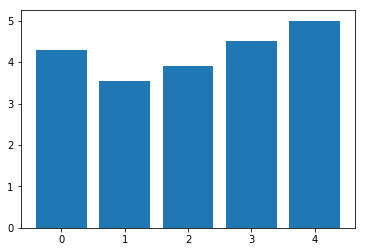

In [27]:
from numpy import arange
bar_positions = arange(5)# + 0.75
print(bar_positions)
# Heights of the bars.  In our case, the average rating for the first movie in the dataset.
num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']
bar_heights = norm_reviews[num_cols].iloc[0].values
fig,ax = plt.subplots()
ax.bar(bar_positions, bar_heights)
plt.show()


    Create a single subplot and assign the returned Figure object to fig and the returned Axes object to ax.
    Generate a bar plot with:
        left set to bar_positions
        height set to bar_heights
        width set to 0.5
    Use plt.show() to display the bar plot.


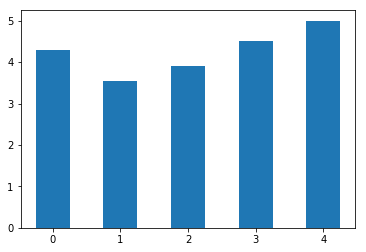

In [28]:
import matplotlib.pyplot as plt
from numpy import arange
num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']

bar_heights = norm_reviews[num_cols].iloc[0].values
bar_positions2 = arange(5)
fig, ax = plt.subplots()
ax.bar(bar_positions2, bar_heights, 0.5) # third is width
plt.show()

    ### See the change for bar positions

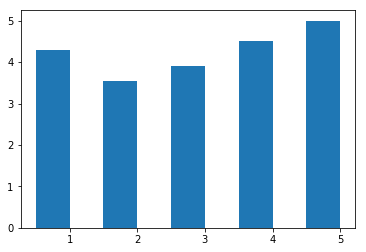

In [59]:
import matplotlib.pyplot as plt
from numpy import arange
num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']

bar_heights = norm_reviews[num_cols].iloc[0].values
bar_positions = arange(5) + 0.75
fig, ax = plt.subplots()
ax.bar(bar_positions, bar_heights, 0.5)
plt.show()

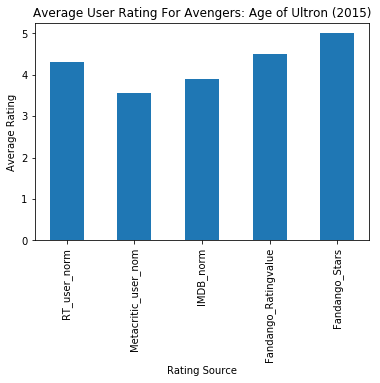

In [31]:
num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']
bar_heights = norm_reviews[num_cols].iloc[0].values
bar_positions = arange(5)
tick_positions = arange(5) #not giving correct answer
#tick_positions = range(0,6,1)
fig, ax = plt.subplots()

ax.bar(bar_positions, bar_heights, width =0.5)
ax.set_xticks(tick_positions)           # setting x tick labes
ax.set_xticklabels(num_cols, rotation=90)

ax.set_xlabel('Rating Source')
ax.set_ylabel('Average Rating')
ax.set_title('Average User Rating For Avengers: Age of Ultron (2015)')
plt.show()

In [32]:
?range

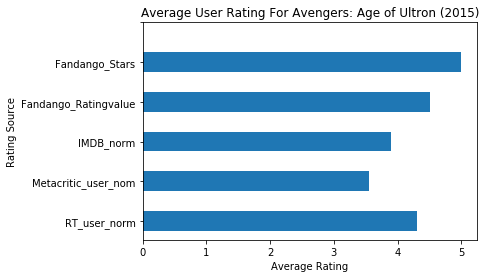

In [35]:
#import seaborn as sns
import matplotlib.pyplot as plt
from numpy import arange
num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']

bar_widths = norm_reviews[num_cols].iloc[0].values
bar_positions = arange(5) 
tick_positions = range(0,6)
fig, ax = plt.subplots()
ax.barh(bar_positions, bar_widths, 0.5)

ax.set_yticks(tick_positions)
ax.set_yticklabels(num_cols)
ax.set_ylabel('Rating Source')
ax.set_xlabel('Average Rating')
ax.set_title('Average User Rating For Avengers: Age of Ultron (2015)')
plt.show()

###  Scatter

A scatter plot helps us determine if 2 columns are weakly or strongly correlated. While calculating the correlation coefficient will give us a precise number, a scatter plot helps us find outliers, gain a more intuitive sense of how spread out the data is, and compare more easily.

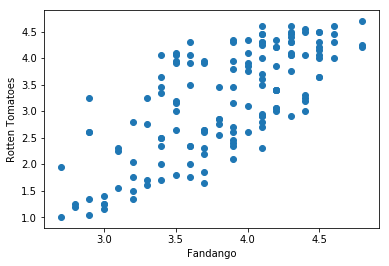

In [85]:

fig, ax = plt.subplots()
ax.scatter(norm_reviews['Fandango_Ratingvalue'], norm_reviews['RT_user_norm'])
ax.set_xlabel('Fandango')
ax.set_ylabel('Rotten Tomatoes')
plt.show()

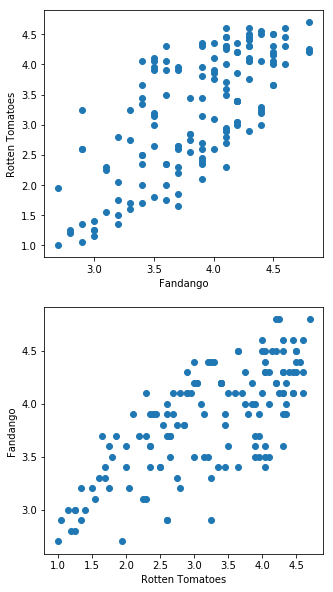

In [86]:
fig = plt.figure(figsize=(5,10))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
ax1.scatter(norm_reviews['Fandango_Ratingvalue'], norm_reviews['RT_user_norm'])
ax1.set_xlabel('Fandango')
ax1.set_ylabel('Rotten Tomatoes')
ax2.scatter(norm_reviews['RT_user_norm'], norm_reviews['Fandango_Ratingvalue'])
ax2.set_xlabel('Rotten Tomatoes')
ax2.set_ylabel('Fandango')
plt.show()

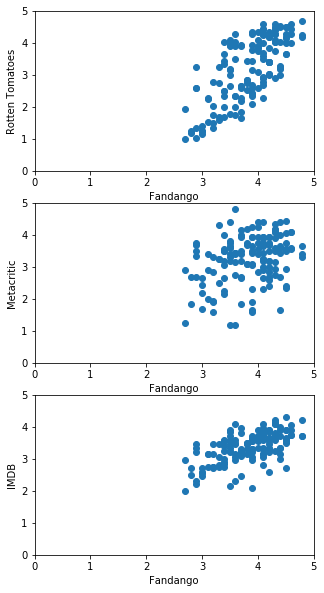

In [90]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(5,10))
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)
ax1.scatter(norm_reviews['Fandango_Ratingvalue'], norm_reviews['RT_user_norm'])
ax1.set_xlabel('Fandango')
ax1.set_ylabel('Rotten Tomatoes')
ax1.set_xlim(0, 5)
ax1.set_ylim(0, 5)

ax2.scatter(norm_reviews['Fandango_Ratingvalue'], norm_reviews['Metacritic_user_nom'])
ax2.set_xlabel('Fandango')
ax2.set_ylabel('Metacritic')
ax2.set_xlim(0, 5)
ax2.set_ylim(0, 5)

ax3.scatter(norm_reviews['Fandango_Ratingvalue'], norm_reviews['IMDB_norm'])
ax3.set_xlabel('Fandango')
ax3.set_ylabel('IMDB')
ax3.set_xlim(0, 5)
ax3.set_ylim(0, 5)

plt.show()

From the scatter plots, we can conclude that user ratings from IMDB and Fandango are the most similar. In addition, user ratings from Metacritic and Rotten Tomatoes have positive but weak correlations with user ratings from Fandango. We can also notice that user ratings from Metacritic and Rotten Tomatoes span a larger range of values than those from IMDB or Fandango. User ratings from Metacritic and Rotten Tomatoes range from 1 to 5. User ratings from Fandango range approximately from 2.5 to 5 while those from IMDB range approximately from 2 to 4.5.

The scatter plots unfortunately only give us a cursory understanding of the distributions of user ratings from each review site. For example, if a hundred movies had the same average user rating from IMDB and Fandango in the dataset, we would only see a single marker in the scatter plot. In the next mission, we'll learn about two types of plots that help us understand distributions of values.

### Histograms And Box Plots

Let's first compare the frequency distributions of user ratings from Fandango with those from IMDB using tables. A column's frequency distribution consists of the unique values in that column along with the count for each of those values (or their frequency). We can use Series.value_counts() to return the frequency distribution as Series object:

In [38]:
freq_counts = norm_reviews['Fandango_Ratingvalue'].value_counts()
print(freq_counts)

4.1    16
4.2    12
3.9    12
4.3    11
3.7     9
3.5     9
4.5     9
3.4     9
3.6     8
4.4     7
4.0     7
3.2     5
2.9     5
3.8     5
3.3     4
4.6     4
3.0     4
4.8     3
3.1     3
2.8     2
2.7     2
Name: Fandango_Ratingvalue, dtype: int64


While this ordering is helpful when we're looking to quickly find the most common values in a given column, it's not helpful when trying to understand the range that the values in the column span. We can use Series.sort_index() to sort the frequency distribution in ascending order by the values in the column (which make up the index for the Series object):


In [39]:
freq_counts = norm_reviews['Fandango_Ratingvalue'].value_counts()
sorted_fr_counts = freq_counts.sort_index()


    Use the value_counts() method to return the frequency counts for the Fandango_Ratingvalue column. Sort the resulting Series object by the index and assign to fandango_distribution.
    Use the value_counts() method to return frequency counts the IMDB_norm column. Sort the resulting Series object by the index and assign to imdb_distribution.
    Use the print() function to display fandango_distribution and imdb_distribution.


In [91]:

fandango_distribution = norm_reviews['Fandango_Ratingvalue'].value_counts()
fandango_distribution = fandango_distribution.sort_index()

imdb_distribution = norm_reviews['IMDB_norm'].value_counts()
imdb_distribution = imdb_distribution.sort_index()

print(fandango_distribution)
print(imdb_distribution)

2.7     2
2.8     2
2.9     5
3.0     4
3.1     3
3.2     5
3.3     4
3.4     9
3.5     9
3.6     8
3.7     9
3.8     5
3.9    12
4.0     7
4.1    16
4.2    12
4.3    11
4.4     7
4.5     9
4.6     4
4.8     3
Name: Fandango_Ratingvalue, dtype: int64
2.00     1
2.10     1
2.15     1
2.20     1
2.30     2
2.45     2
2.50     1
2.55     1
2.60     2
2.70     4
2.75     5
2.80     2
2.85     1
2.90     1
2.95     3
3.00     2
3.05     4
3.10     1
3.15     9
3.20     6
3.25     4
3.30     9
3.35     7
3.40     1
3.45     7
3.50     4
3.55     7
3.60    10
3.65     5
3.70     8
3.75     6
3.80     3
3.85     4
3.90     9
3.95     2
4.00     1
4.05     1
4.10     4
4.15     1
4.20     2
4.30     1
Name: IMDB_norm, dtype: int64


Because there are only a few unique values, we can quickly scan the frequency counts and confirm that the Fandango_Ratingvalue column ranges from 2.7 to 4.8 while the IMDB_norm column ranges from 2 to 4.3. While we can quickly determine the minimum and maximum values, we struggle to answer the following questions about a column:

    What percent of the ratings are contained in the 2.0 to 4.0 range?
        How does this compare with other sites?
    Which values represent the top 25% of the ratings? The bottom 25%?
        How does this compare with other sites?

Comparing frequency distributions is also challenging because the Fandango_Ratingvalue column contains 21 unique values while IMDB_norm contains 41 unique values. We need a way to compare frequencies across a shared set of values. Because all ratings have been normalized to a range of 0 to 5, we can start by dividing the range of possible values into a series of fixed length intervals, called bins. We can then sum the frequencies for the values that fall into each bin. 

%load image here
The distributions for both of these columns are now easier to compare because of the shared x-axis (the bins). We can now plot the bins along with the frequency sums as a bar plot. This type of plot is called a histogram. Let's dive right into creating a histogram in matplotlib.

### by default

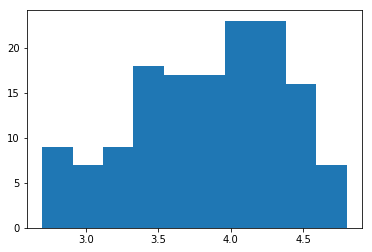

In [93]:
fig, ax = plt.subplots()
ax.hist(norm_reviews['Fandango_Ratingvalue'])
plt.show()

We can generate a histogram using Axes.hist(). This method has only 1 required parameter, an iterable object containing the values we want a histogram for. By default, matplotlib will:

    calculate the minimum and maximum value from the sequence of values we passed in
    create 10 bins of equal length that span the range from the minimum to the maximum value
    group unique values into the bins
    sum up the associated unique values
    generate a bar for the frequency sum for each bin


     

The default behavior of Axes.hist() is problematic for the use case of comparing distributions for multiple columns using the same binning strategy. This is because the binning strategy for each column would depend on the minimum and maximum values, instead of a shared binning strategy. We can use the range parameter to specify the range we want matplotlib to use as a tuple: in the below graph

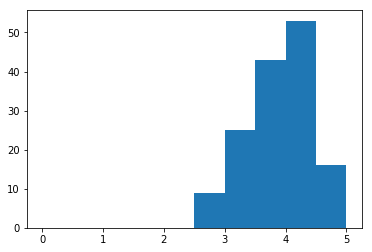

In [42]:

fig, ax = plt.subplots()
ax.hist(norm_reviews['Fandango_Ratingvalue'], range=(0, 5))
plt.show()

While histograms use bars whose lengths are scaled to the values they're representing, they differ from bar plots in a few ways. Histograms help us visualize continuous values using bins while bar plots help us visualize discrete values. The locations of the bars on the x-axis matter in a histogram but they don't in a simple bar plot. Lastly, bar plots also have gaps between the bars, to emphasize that the values are discrete.

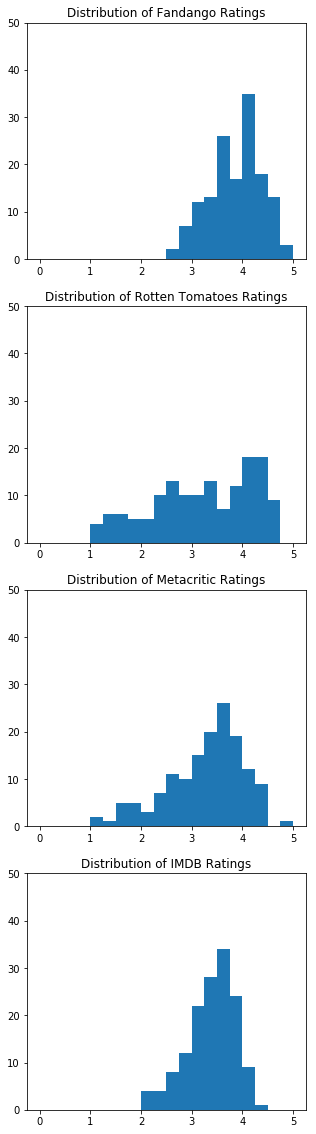

In [97]:
fig = plt.figure(figsize=(5,20))
ax1 = fig.add_subplot(4,1,1)
ax2 = fig.add_subplot(4,1,2)
ax3 = fig.add_subplot(4,1,3)
ax4 = fig.add_subplot(4,1,4)
ax1.hist(norm_reviews['Fandango_Ratingvalue'], bins=20, range=(0, 5))
ax1.set_title('Distribution of Fandango Ratings')
ax1.set_ylim(0, 50)

ax2.hist(norm_reviews['RT_user_norm'], 20, range=(0, 5))
ax2.set_title('Distribution of Rotten Tomatoes Ratings')
ax2.set_ylim(0, 50)

ax3.hist(norm_reviews['Metacritic_user_nom'], 20, range=(0, 5))
ax3.set_title('Distribution of Metacritic Ratings')
ax3.set_ylim(0, 50)

ax4.hist(norm_reviews['IMDB_norm'], 20, range=(0, 5))
ax4.set_title('Distribution of IMDB Ratings')
ax4.set_ylim(0, 50)

plt.show()

From the histograms, we can make the following observations:

    Around 50% of user ratings from Fandango fall in the 2 to 4 score range
    Around 50% of user ratings from Rotten Tomatoes fall in the 2 to 4 score range
    Around 75% of the user ratings from Metacritic fall in the 2 to 4 score range
    Around 90% of the user ratings from IMDB fall in the 2 to 4 score range

While histograms allow us to visually estimate the percentage of ratings that fall into a range of bins, they don't allow us to easily understand how the top 25% or the bottom 25% of the ratings differ across the sites. The bottom 25% of values and top 25% of values both represent quartiles. The four quartiles divide the range of values into four regions where each region contains 1/4th of the total values.

While these regions may sound similar to bins, they differ in how values are grouped into each region. Each bin covers an equal proportion of the values in the range. On the other hand, each quantile covers an equal number of values (1/4th of the total values). To visualize quartiles, we need to use a box plot, also referred to as a box-and-whisker plot

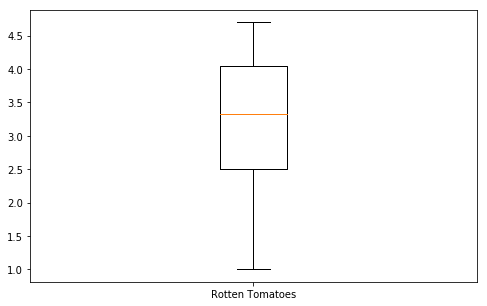

In [118]:

fig, ax = plt.subplots(figsize=(8,5))
ax.boxplot(norm_reviews['RT_user_norm'])
ax.set_xticklabels(['Rotten Tomatoes'])
#ax.set_ylim(0,5)
plt.show()

From the box plot we generated using Rotten Tomatoes ratings, we can conclude that:

    the bottom 25% of user ratings range from around 1 to 2.5
    the top 25% of of user ratings range from around 4 to 4.6

To compare the lower and upper ranges with those for the other columns, we need to generate multiple box-and-whisker diagrams in the same box plot. When selecting multiple columns to pass in to Axes.boxplot(), we need to use the values accessor to return a multi-dimensional numpy array:


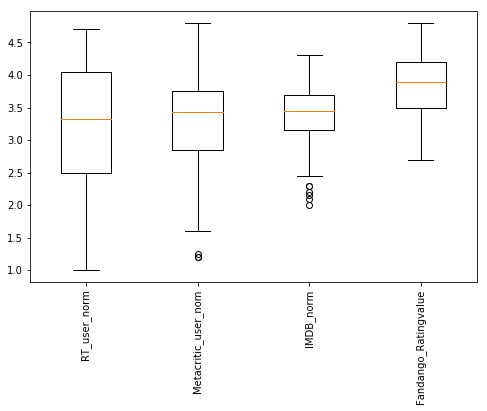

In [119]:
num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue']
fig, ax = plt.subplots(figsize=(8,5))
ax.boxplot(norm_reviews[num_cols].values)
ax.set_xticklabels(num_cols, rotation=90)
#ax.set_ylim(0,5,0.5)
plt.show()



From the boxplot, we can reach the following conclusions:

    user ratings from Rotten Tomatoes and Metacritic span a larger range of values
    user ratings from IMDB and Fandango are both skewed in the positive direction and span a more constrained range of values

In addition, you may have noticed there are a couple user ratings from both Metacritic and IMDB that are just beyond the boxplot's whiskers. These values are called outliers or extreme values. Outliers are usually treated as abnormal values and affect the overall observation of the data set due to their very high or low values.

In this mission, we learned how to use histograms and box plots to visualize and compare the distributions of the ratings from the four movie review sites. Next in this course is a guided project, where we'll explore how to use pandas with matplotlib effectively and create more complex plots.